In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_csv('data/CMOST TA.csv', index_col="ID")
df.head()

,Generator,Status,Result Status,Proxy Role,Keep SR3,Has SR3,Rating,Frac_Con,Frac_Spacing,Half_Length,Mat_Perm,Mat_Por,Thickness,CGP,RF,Execution Node,Dataset Path,Optimal,MCMC Count,Comment
ID,,,,,,,,,,,,,,,,,,,,
0,Reuse,Reused,NormalTermination,Ignore,Yes,True,0,5.000000,50.000000,150.00000,0.000230,0.050000,1000.00000,537830590.0,63.497124,NaN,Shale_Gas_Model HF_TA.dat,False,0,NaN
1,LatinHyperCube,Complete,NormalTermination,Training,Auto,False,0,4.231707,53.674699,149.45783,0.000227,0.041220,1043.90240,463054690.0,66.086990,ACER,TA HF CMG-DECE.cmsd\TA HF CMG-DECE_00001.dat,False,0,NaN
2,LatinHyperCube,Complete,NormalTermination,Training,Auto,False,0,4.231707,62.349398,151.62651,0.000201,0.059512,970.73171,608775170.0,60.545357,ACER,TA HF CMG-DECE.cmsd\TA HF CMG-DECE_00002.dat,False,0,NaN
3,LatinHyperCube,Complete,NormalTermination,Training,Auto,False,0,6.500000,47.650602,141.86747,0.000260,0.039756,795.12195,454180510.0,66.868286,ACER,TA HF CMG-DECE.cmsd\TA HF CMG-DECE_00003.dat,False,0,NaN
4,LatinHyperCube,Complete,NormalTermination,Training,Auto,False,0,5.914634,58.734940,119.09639,0.000260,0.057683,956.09756,586464380.0,60.129814,ACER,TA HF CMG-DECE.cmsd\TA HF CMG-DECE_00004.dat,False,0,NaN


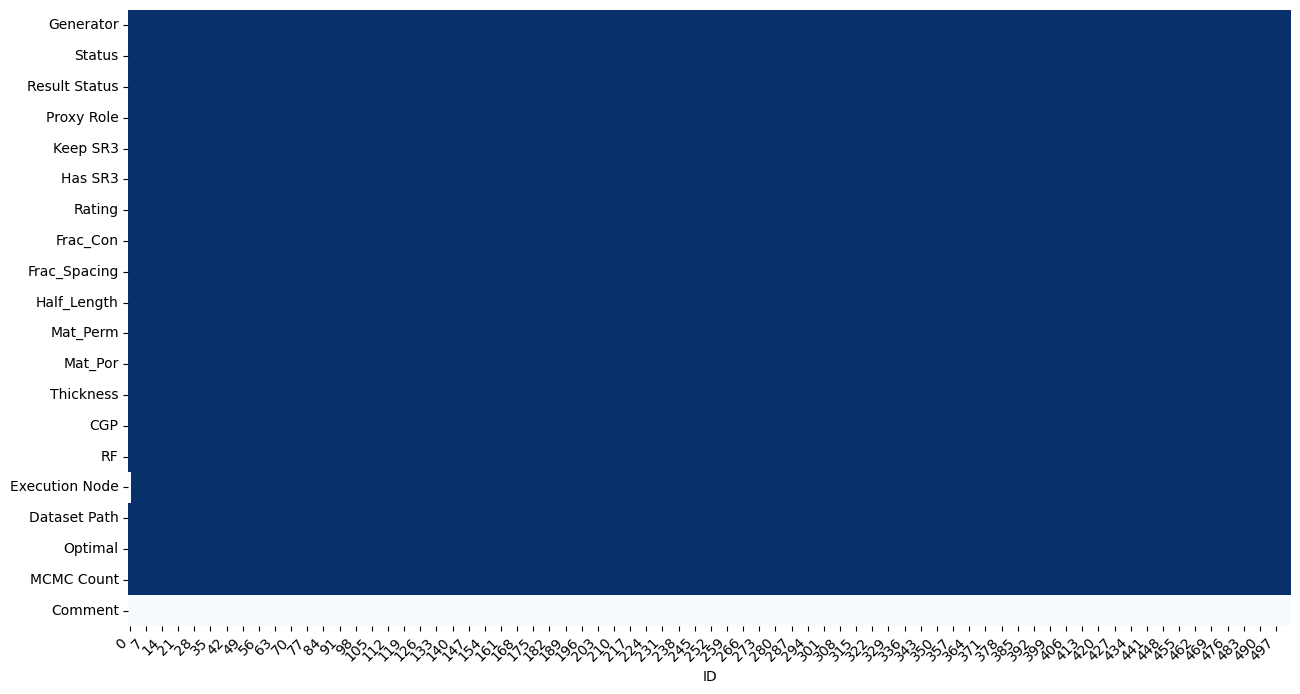

In [7]:
plot_missing_value(df)

In [8]:
df.columns

Index(['Generator', 'Status', 'Result Status', 'Proxy Role', 'Keep SR3',
       'Has SR3', 'Rating', 'Frac_Con', 'Frac_Spacing', 'Half_Length',
       'Mat_Perm', 'Mat_Por', 'Thickness', 'CGP', 'RF', 'Execution Node',
       'Dataset Path', 'Optimal', 'MCMC Count', 'Comment'],
      dtype='object')

In [9]:
df.drop(columns = (['Generator', 'Status', 'Result Status', 'Proxy Role', 'Keep SR3',
       'Has SR3', 'Rating', 'Execution Node',
       'Dataset Path', 'Optimal', 'MCMC Count', 'Comment']), inplace = True)

In [10]:
df.tail(10)

,Frac_Con,Frac_Spacing,Half_Length,Mat_Perm,Mat_Por,Thickness,CGP,RF
ID,,,,,,,,
494,3.682927,56.084337,129.93976,0.000284,0.055122,1168.29270,571873540.0,61.528084
495,6.500000,50.060241,107.16867,0.000259,0.051463,1153.65850,529514340.0,60.928448
496,4.780488,60.180723,183.07229,0.000210,0.042683,912.19512,481745760.0,66.304619
497,3.573171,48.373494,165.72289,0.000178,0.055854,1080.48780,582663550.0,61.791061
498,4.048781,50.783133,150.54217,0.000195,0.037561,1000.00000,428919780.0,66.973663
499,6.060976,47.409639,124.51807,0.000272,0.059512,1139.02440,602520900.0,60.092815
500,5.365854,59.698795,111.50602,0.000267,0.062805,970.73171,613128130.0,57.831512
501,3.536585,58.734940,105.00000,0.000230,0.057317,1058.53660,566356350.0,58.532967
502,5.548781,54.397590,184.15663,0.000190,0.060976,1285.36590,626175740.0,61.127422


In [18]:
df.drop(columns = (['CGP']), inplace = True)

In [19]:
df.head()

,Frac_Con,Frac_Spacing,Half_Length,Mat_Perm,Mat_Por,Thickness,RF
ID,,,,,,,
0,5.000000,50.000000,150.00000,0.000230,0.050000,1000.00000,63.497124
1,4.231707,53.674699,149.45783,0.000227,0.041220,1043.90240,66.086990
2,4.231707,62.349398,151.62651,0.000201,0.059512,970.73171,60.545357
3,6.500000,47.650602,141.86747,0.000260,0.039756,795.12195,66.868286
4,5.914634,58.734940,119.09639,0.000260,0.057683,956.09756,60.129814


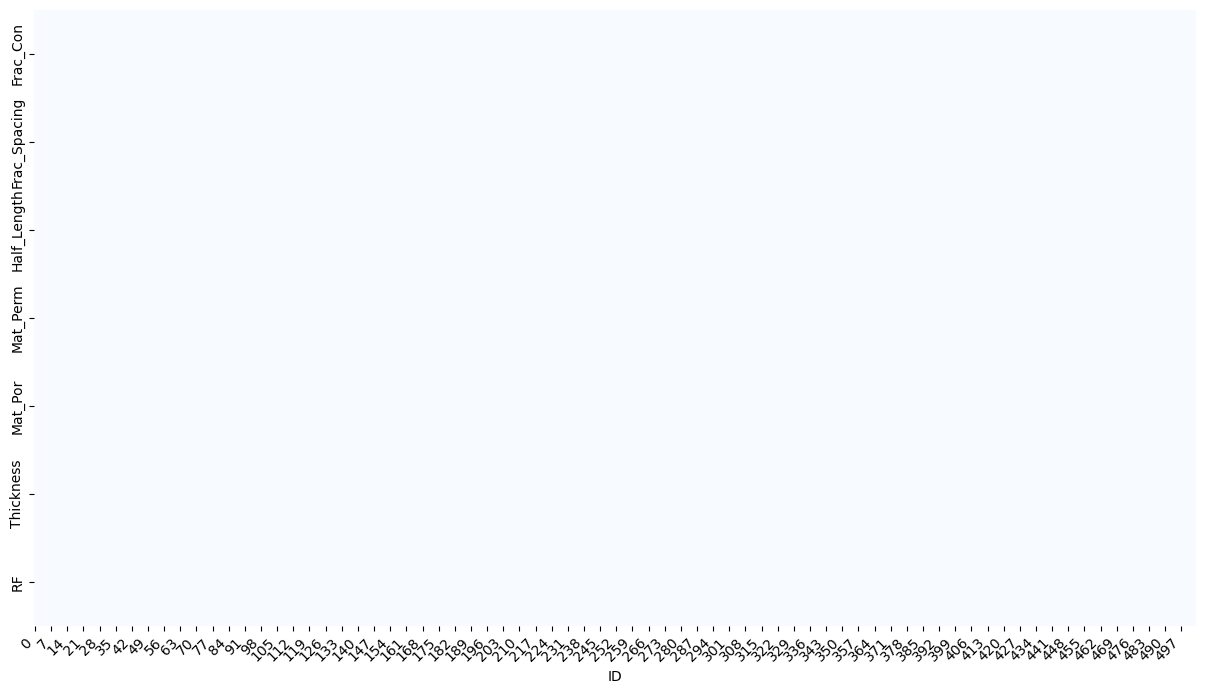

In [20]:
plot_missing_value(df)

<AxesSubplot:>

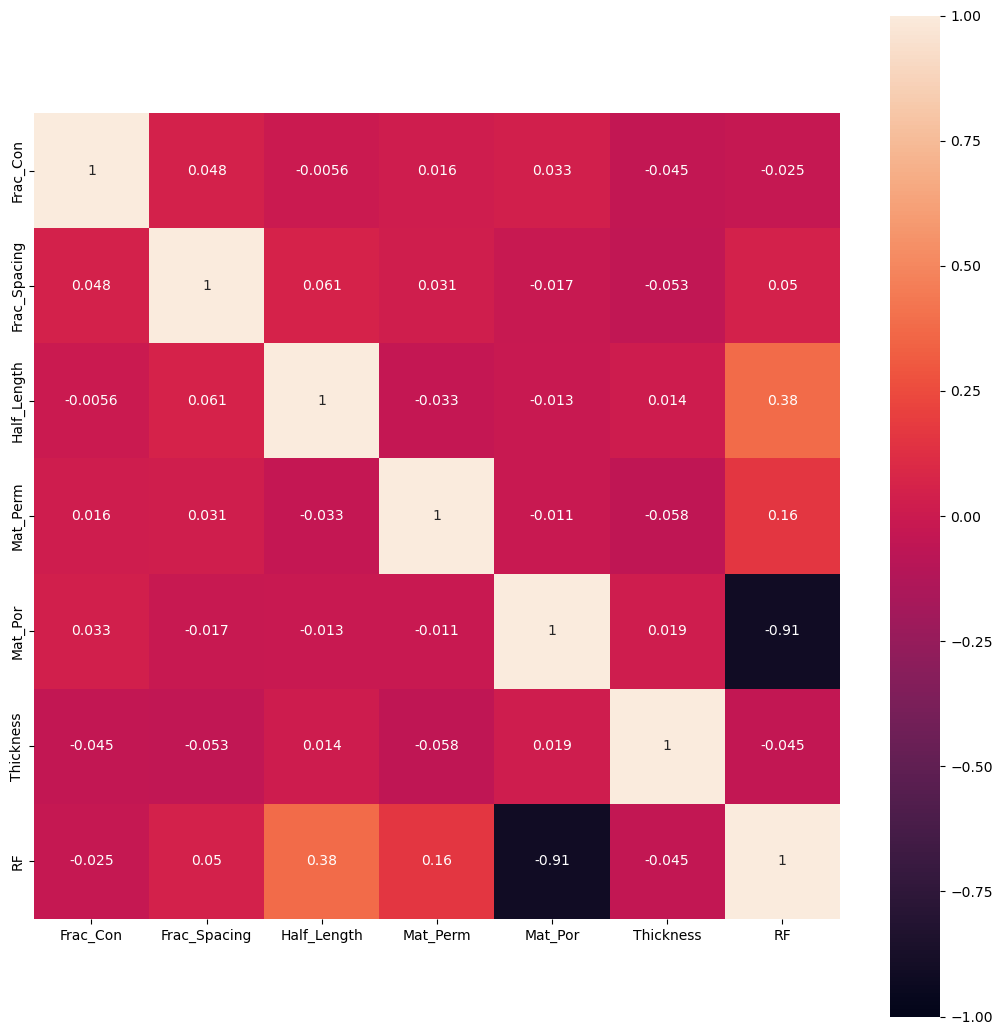

In [21]:
plt.figure(figsize=(13, 13))
sns.heatmap(df.corr(), cbar='False', vmin=-1, vmax=1, annot=True, square=True)

array([[<AxesSubplot:title={'center':'Frac_Con'}>,
        <AxesSubplot:title={'center':'Frac_Spacing'}>,
        <AxesSubplot:title={'center':'Half_Length'}>],
       [<AxesSubplot:title={'center':'Mat_Perm'}>,
        <AxesSubplot:title={'center':'Mat_Por'}>,
        <AxesSubplot:title={'center':'Thickness'}>],
       [<AxesSubplot:title={'center':'RF'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

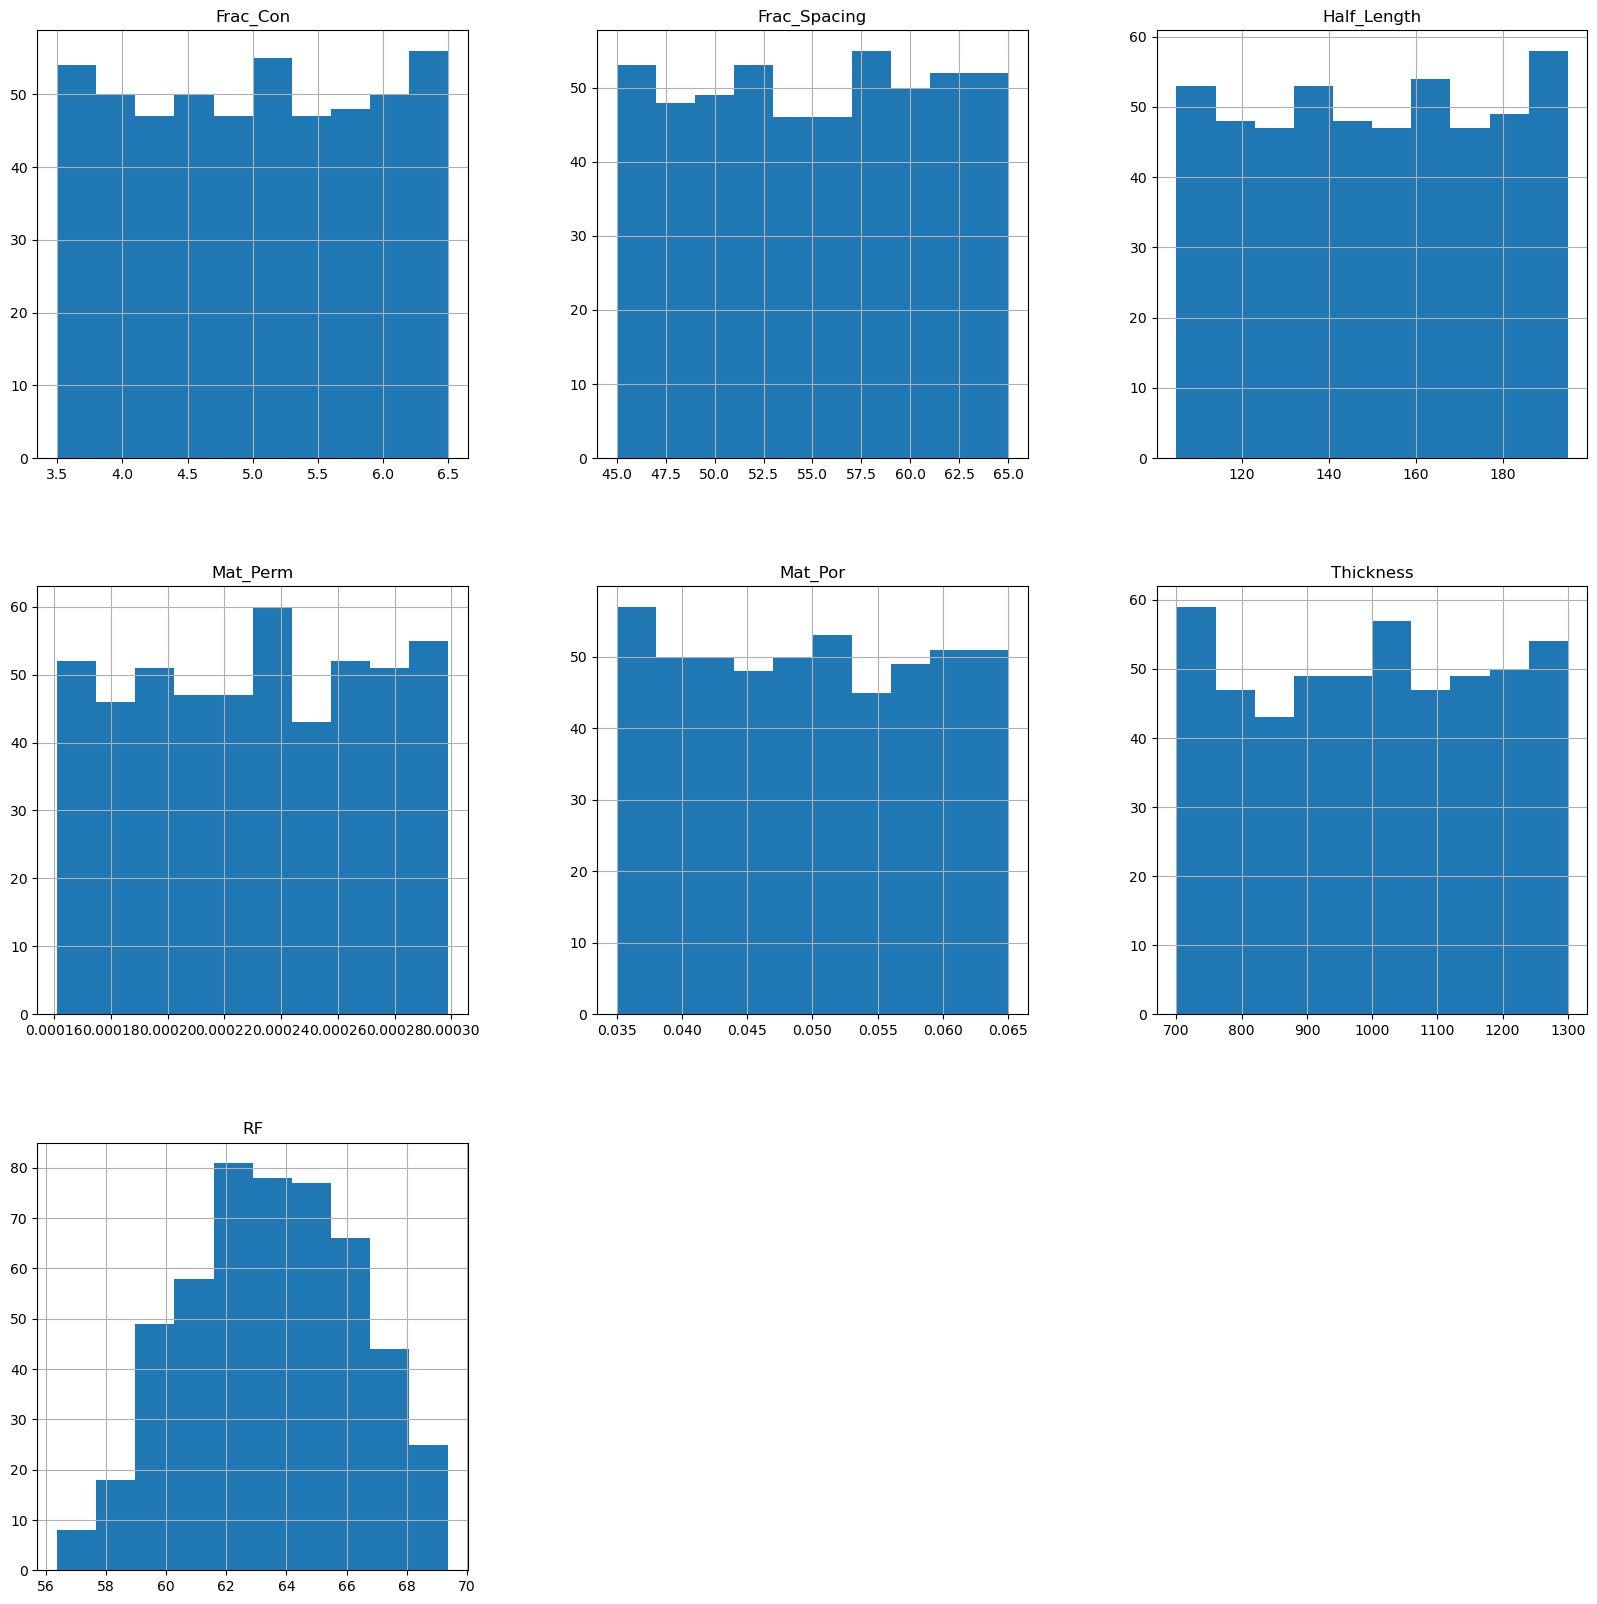

In [22]:
df.hist(figsize=(20, 20))

In [23]:
X = df.drop(columns='RF')
y = df.RF

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((403, 6), (101, 6), (403,), (101,))

In [24]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [25]:
X_train.columns

Index(['Frac_Con', 'Frac_Spacing', 'Half_Length', 'Mat_Perm', 'Mat_Por',
       'Thickness'],
      dtype='object')

In [26]:
rsp.xgb_poly_params

{'prep__numeric__poly__degree': Integer(low=1, high=3),
 'prep__numeric__poly__interaction_only': [True, False],
 'algo__max_depth': Integer(low=1, high=10),
 'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
 'algo__n_estimators': Integer(low=100, high=200),
 'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
 'algo__gamma': Integer(low=1, high=10),
 'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
 'algo__reg_alpha': Real(low=-3, high=1, prior='log-uniform'),
 'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform')}

In [37]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2), ['Frac_Con', 'Frac_Spacing', 'Half_Length', 'Mat_Perm', 'Mat_Por',
       'Thickness']),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])


model_XGRF = RandomizedSearchCV(pipeline, rsp.xgb_poly_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model_XGRF.fit(X_train, y_train)

print(model_XGRF.best_params_)
print(model_XGRF.score(X_train, y_train), model_XGRF.best_score_, model_XGRF.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__colsample_bytree': 0.6179267600882911, 'algo__gamma': 2, 'algo__learning_rate': 0.14019550306309433, 'algo__max_depth': 1, 'algo__n_estimators': 132, 'algo__reg_alpha': 1.7571818426047676, 'algo__reg_lambda': 1.9167165948710119, 'algo__subsample': 0.6129698350507864, 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
0.9885287815240519 0.9761787977071403 0.9842954410162523


In [38]:
model_XGRF.score(X_train, y_train), model_XGRF.score(X_test, y_test)

(0.9885287815240519, 0.9842954410162523)

In [39]:
from jcopml.plot import plot_actual_vs_prediction, plot_residual

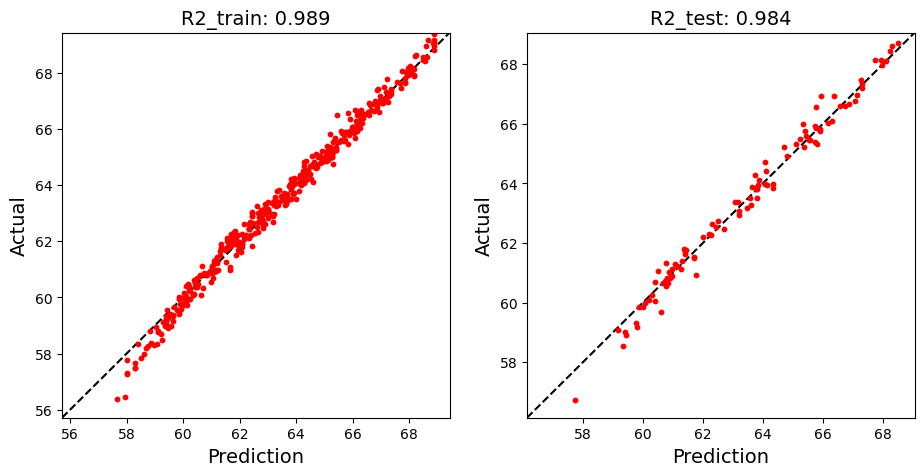

In [40]:
plot_actual_vs_prediction(X_train, y_train, X_test, y_test, model_XGRF)

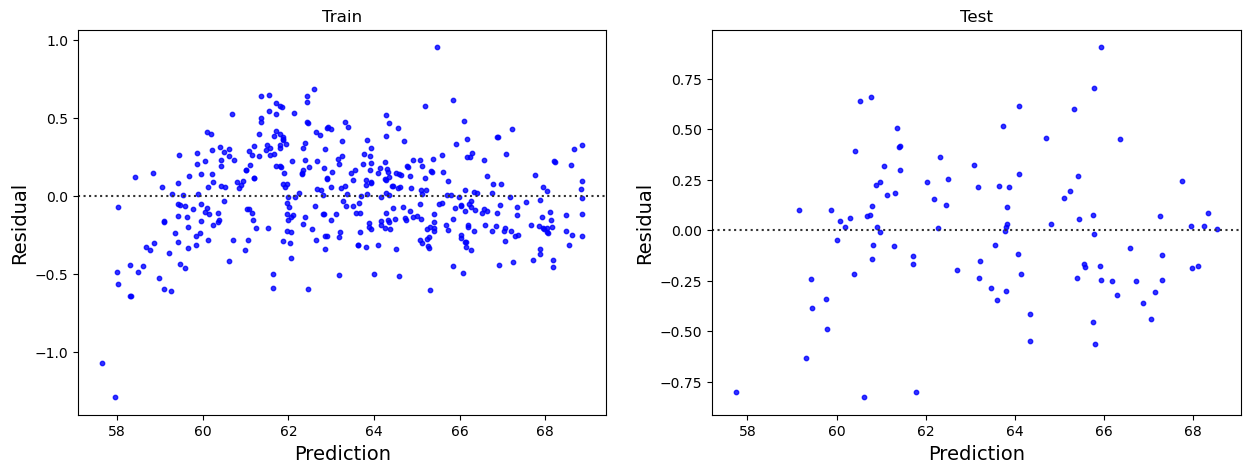

In [41]:
plot_residual(X_train, y_train, X_test, y_test, model_XGRF)

In [42]:
from jcopml.feature_importance import  mean_loss_decrease
from jcopml.feature_importance import mean_score_decrease

In [43]:
X_train.iloc[:1]

,Frac_Con,Frac_Spacing,Half_Length,Mat_Perm,Mat_Por,Thickness
ID,,,,,,
75,4.780488,60.421687,170.06024,0.000257,0.063171,1300.0


In [44]:
X_pred = pd.DataFrame([[5.000, 50.000, 150.000, 0.000230, 0.050000, 1000.000]], columns=X_train.columns)
X_pred

,Frac_Con,Frac_Spacing,Half_Length,Mat_Perm,Mat_Por,Thickness
0,5.0,50.0,150.0,0.00023,0.05,1000.0


In [45]:
model_XGRF.predict(X_pred)

array([63.562054], dtype=float32)

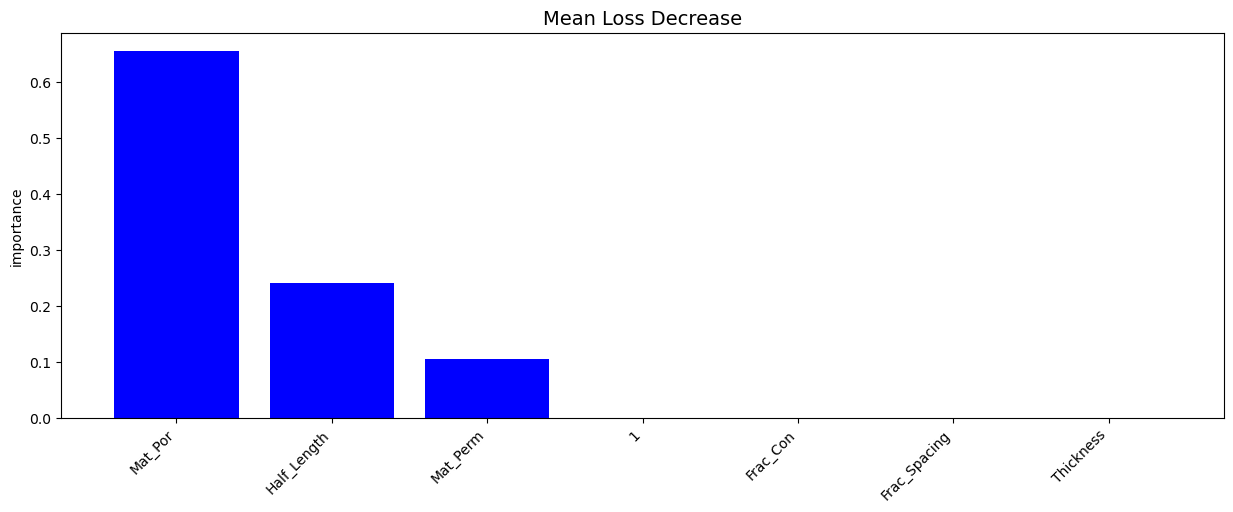

In [47]:
df_imp = mean_loss_decrease(X_train, model_XGRF, plot=True, topk=10)

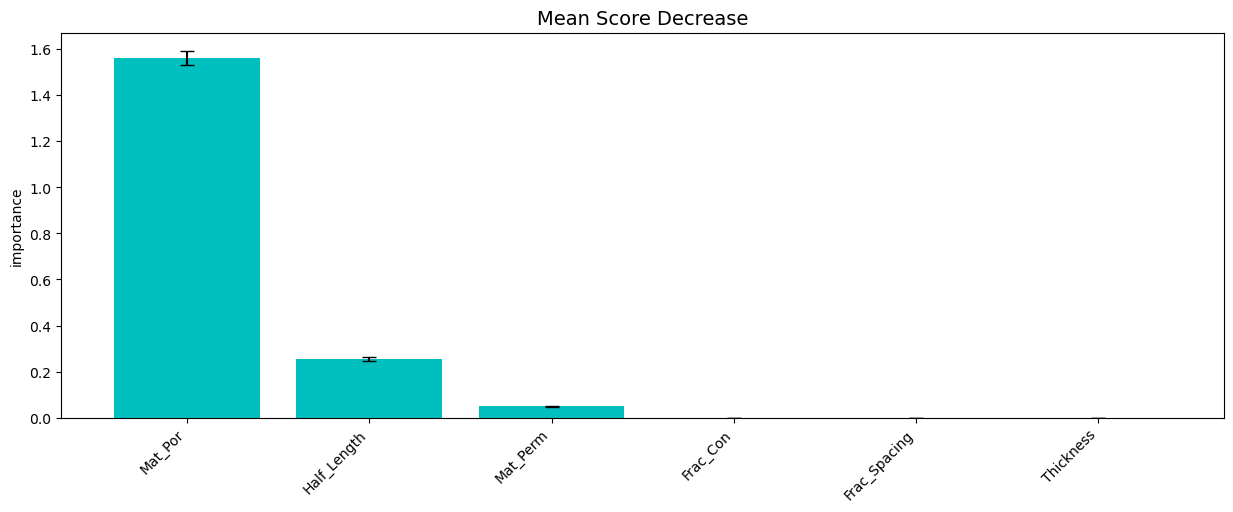

In [49]:
df_imp = mean_score_decrease(X_train, y_train, model_XGRF, plot=True, topk=10)

In [50]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['Frac_Con', 'Frac_Spacing', 'Half_Length', 'Mat_Perm', 'Mat_Por',
       'Thickness']),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])


model_MAE = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, scoring= 'neg_mean_absolute_error', n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model_MAE.fit(X_train, y_train)

print(model_MAE.best_params_)
print(model_MAE.score(X_train, y_train), model_MAE.best_score_, model_MAE.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__colsample_bytree': 0.6918516030703091, 'algo__gamma': 1, 'algo__learning_rate': 0.1216411342539395, 'algo__max_depth': 3, 'algo__n_estimators': 185, 'algo__reg_alpha': 0.011502956321912733, 'algo__reg_lambda': 0.009461469059966103, 'algo__subsample': 0.7865052773762229}
-0.13541366987765108 -0.2744626000242299 -0.21281747819896712


In [52]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['Frac_Con', 'Frac_Spacing', 'Half_Length', 'Mat_Perm', 'Mat_Por',
       'Thickness']),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])


model_MSE = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, scoring= 'neg_mean_squared_error', n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model_MSE.fit(X_train, y_train)

print(model_MSE.best_params_)
print(model_MSE.score(X_train, y_train), model_MSE.best_score_, model_MSE.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__colsample_bytree': 0.6918516030703091, 'algo__gamma': 1, 'algo__learning_rate': 0.1216411342539395, 'algo__max_depth': 3, 'algo__n_estimators': 185, 'algo__reg_alpha': 0.011502956321912733, 'algo__reg_lambda': 0.009461469059966103, 'algo__subsample': 0.7865052773762229}
-0.03035221973066225 -0.13226249044526525 -0.07161363419652576


In [53]:
save_model (model_XGRF, 'Predict_RF')

Model is pickled as model/Predict_RF


# Finishing

In [54]:
RF_test = model_XGRF.predict(X_test)
RF_train = model_XGRF.predict(X_train)

In [55]:
load_model ('model/Predict_RF')

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('poly',
                                                                                                PolynomialFeatures())]),
                                                                               ['Frac_Con',
                                                                                'Frac_Spacing',
                                                                                'Half_Length',
                                                                                'Mat_

In [56]:
X_train.head()

,Frac_Con,Frac_Spacing,Half_Length,Mat_Perm,Mat_Por,Thickness
ID,,,,,,
75,4.780488,60.421687,170.06024,0.000257,0.063171,1300.00000
442,3.609756,51.506024,187.40964,0.000277,0.062439,802.43902
15,5.292683,49.337349,152.71084,0.000220,0.044878,773.17073
325,5.621951,45.000000,135.36145,0.000277,0.041951,1036.58540
388,5.768293,61.144578,161.38554,0.000280,0.049268,1197.56100


In [57]:
df.columns

Index(['Frac_Con', 'Frac_Spacing', 'Half_Length', 'Mat_Perm', 'Mat_Por',
       'Thickness', 'RF'],
      dtype='object')

In [58]:
input_variable_test = df.drop(columns = 'RF')

In [59]:
input_variable_test.head ()

,Frac_Con,Frac_Spacing,Half_Length,Mat_Perm,Mat_Por,Thickness
ID,,,,,,
0,5.000000,50.000000,150.00000,0.000230,0.050000,1000.00000
1,4.231707,53.674699,149.45783,0.000227,0.041220,1043.90240
2,4.231707,62.349398,151.62651,0.000201,0.059512,970.73171
3,6.500000,47.650602,141.86747,0.000260,0.039756,795.12195
4,5.914634,58.734940,119.09639,0.000260,0.057683,956.09756


In [60]:
RF_Predict_XGB = model_XGRF.predict(input_variable_test)
df.insert (6, column = 'RF_XGB', value = RF_Predict_XGB, allow_duplicates = False)

In [61]:
df.head (21)

,Frac_Con,Frac_Spacing,Half_Length,Mat_Perm,Mat_Por,Thickness,RF_XGB,RF
ID,,,,,,,,
0,5.000000,50.000000,150.00000,0.000230,0.050000,1000.00000,63.562054,63.497124
1,4.231707,53.674699,149.45783,0.000227,0.041220,1043.90240,66.182655,66.086990
2,4.231707,62.349398,151.62651,0.000201,0.059512,970.73171,60.785774,60.545357
3,6.500000,47.650602,141.86747,0.000260,0.039756,795.12195,66.626129,66.868286
4,5.914634,58.734940,119.09639,0.000260,0.057683,956.09756,60.349094,60.129814
5,4.451219,59.698795,129.93976,0.000270,0.050732,1263.41460,62.898991,62.621948
6,4.451219,45.240964,146.20482,0.000247,0.064634,817.07317,60.148895,59.914524
7,5.987805,48.373494,115.84337,0.000264,0.054024,934.14634,61.252048,60.968330
8,6.317073,65.000000,129.93976,0.000289,0.043049,912.19512,65.407608,65.362289


In [62]:
df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            494, 495, 496, 497, 498, 499, 500, 501, 502, 503],
           dtype='int64', name='ID', length=504)

In [63]:
df.reset_index(inplace=True)
df

,ID,Frac_Con,Frac_Spacing,Half_Length,Mat_Perm,Mat_Por,Thickness,RF_XGB,RF
0,0,5.000000,50.000000,150.00000,0.000230,0.050000,1000.00000,63.562054,63.497124
1,1,4.231707,53.674699,149.45783,0.000227,0.041220,1043.90240,66.182655,66.086990
2,2,4.231707,62.349398,151.62651,0.000201,0.059512,970.73171,60.785774,60.545357
3,3,6.500000,47.650602,141.86747,0.000260,0.039756,795.12195,66.626129,66.868286
4,4,5.914634,58.734940,119.09639,0.000260,0.057683,956.09756,60.349094,60.129814
...,...,...,...,...,...,...,...,...,...
499,499,6.060976,47.409639,124.51807,0.000272,0.059512,1139.02440,60.194065,60.092815
500,500,5.365854,59.698795,111.50602,0.000267,0.062805,970.73171,58.495556,57.831512
501,501,3.536585,58.734940,105.00000,0.000230,0.057317,1058.53660,59.319077,58.532967
502,502,5.548781,54.397590,184.15663,0.000190,0.060976,1285.36590,60.978653,61.127422


In [64]:
def get_rmse (y_true, y_pred):
    return np.sqrt (np.mean((y_pred-y_true)**2.00))
def get_rel_l2_error(y_true, y_pred):
    return np.linalg.norm(y_true-y_pred, 2) / np.linalg.norm(y_true, 2)

In [65]:
X1 = df.ID
y1 = df.RF
y2 = df.RF_XGB

Text(0, 0.5, 'RF')

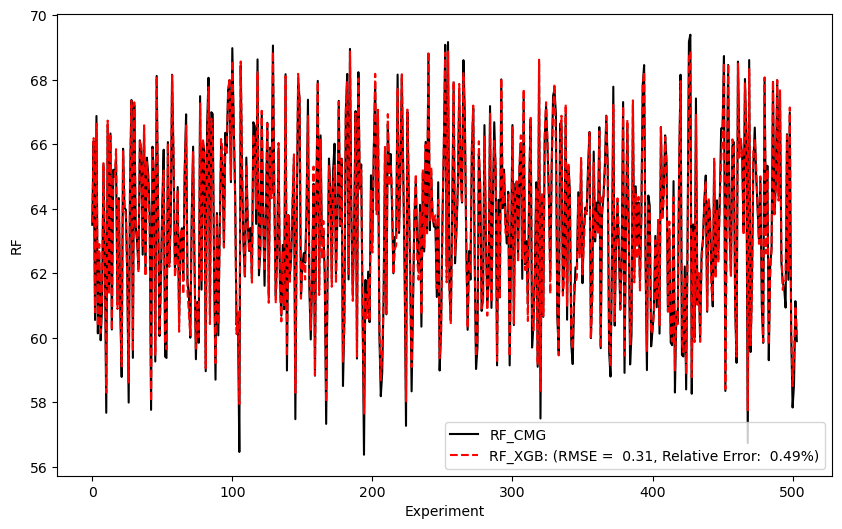

In [69]:
fig = plt.figure(figsize= (10, 6))
ax = plt.axes()

rmse_XG = get_rmse(df['RF'], df['RF_XGB']) 
l2_XG = get_rel_l2_error(df['RF'], df['RF_XGB']) * 100

ax.plot(X1, y1, 'k-', label = 'RF_CMG')
ax.plot(X1, y2, 'r--', label = f'RF_XGB: (RMSE = {rmse_XG: .2f}, Relative Error: {l2_XG: .2f}%)')

ax.legend()
plt.xlabel('Experiment')
plt.ylabel('RF')